### Diamond Price Prediction
#### Introduction About the Data :
The dataset The goal is to predict price of given diamond (Regression Analysis).

- There are 10 independent variables (including id):

1. id : unique identifier of each diamond
2. carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
3. cut : Quality of Diamond Cut
4. color : Color of Diamond
5. clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
6. depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
7. table : A diamond's table is the facet which can be seen when the stone is viewed face up.
8. x : Diamond X dimension
9. y : Diamond Y dimension
10. z : Diamond Z dimension

- Target variable:

1. price: Price of the given Diamond.

Dataset Source Link : https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### EDA and FE


In [2]:
df = pd.read_csv('notebook/gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


### Observation

- There are 3 categorical features and remaining other are numerical features
- There is no null value 
- no need of id column


In [4]:
df = df.drop(columns='id', axis=1)
df.sample(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
133642,1.01,Ideal,F,SI2,60.9,57.0,6.45,6.49,3.94,4280
137645,1.01,Very Good,E,VS2,63.0,60.0,6.41,6.39,4.03,6537
136454,0.54,Ideal,F,VS1,61.5,55.0,5.22,5.25,3.22,1770
98068,1.00,Premium,G,VS2,63.0,54.0,6.30,6.36,3.99,5701
63009,0.32,Ideal,F,VS2,61.1,56.0,4.44,4.38,2.69,828


In [5]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [6]:
df.duplicated().sum()

0

### Observation 
- no duplicate values
- no null values

In [7]:
# Checking the number of unique values of each column along with respective column name
def get_unique_categorical_values(df):
    categorical_columns = df.select_dtypes(include='object').columns
    unique_values = {}

    for column in categorical_columns:
        unique_values[column] = df[column].unique()

    return unique_values

unique_values = get_unique_categorical_values(df)

for column, values in unique_values.items():
    print(f"Column: {column}")
    print(f"Unique Values: {values}")
    print()

Column: cut
Unique Values: ['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']

Column: color
Unique Values: ['F' 'J' 'G' 'E' 'D' 'H' 'I']

Column: clarity
Unique Values: ['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1']



### Observation 
- There are 5 unique values in cut feature of the data frame. 
- There are 7 unique values in color feature of the data frame. 
- There are 8 unique values in clarity feature of the data frame. 

In [10]:
# differentiate categorical and numerical features 

# define numerical & categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

We have 3 categorical features : ['cut', 'color', 'clarity']


In [9]:
df.describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


### Exploring Data ( Visualization )

#### Multivariate analysis using pieplot

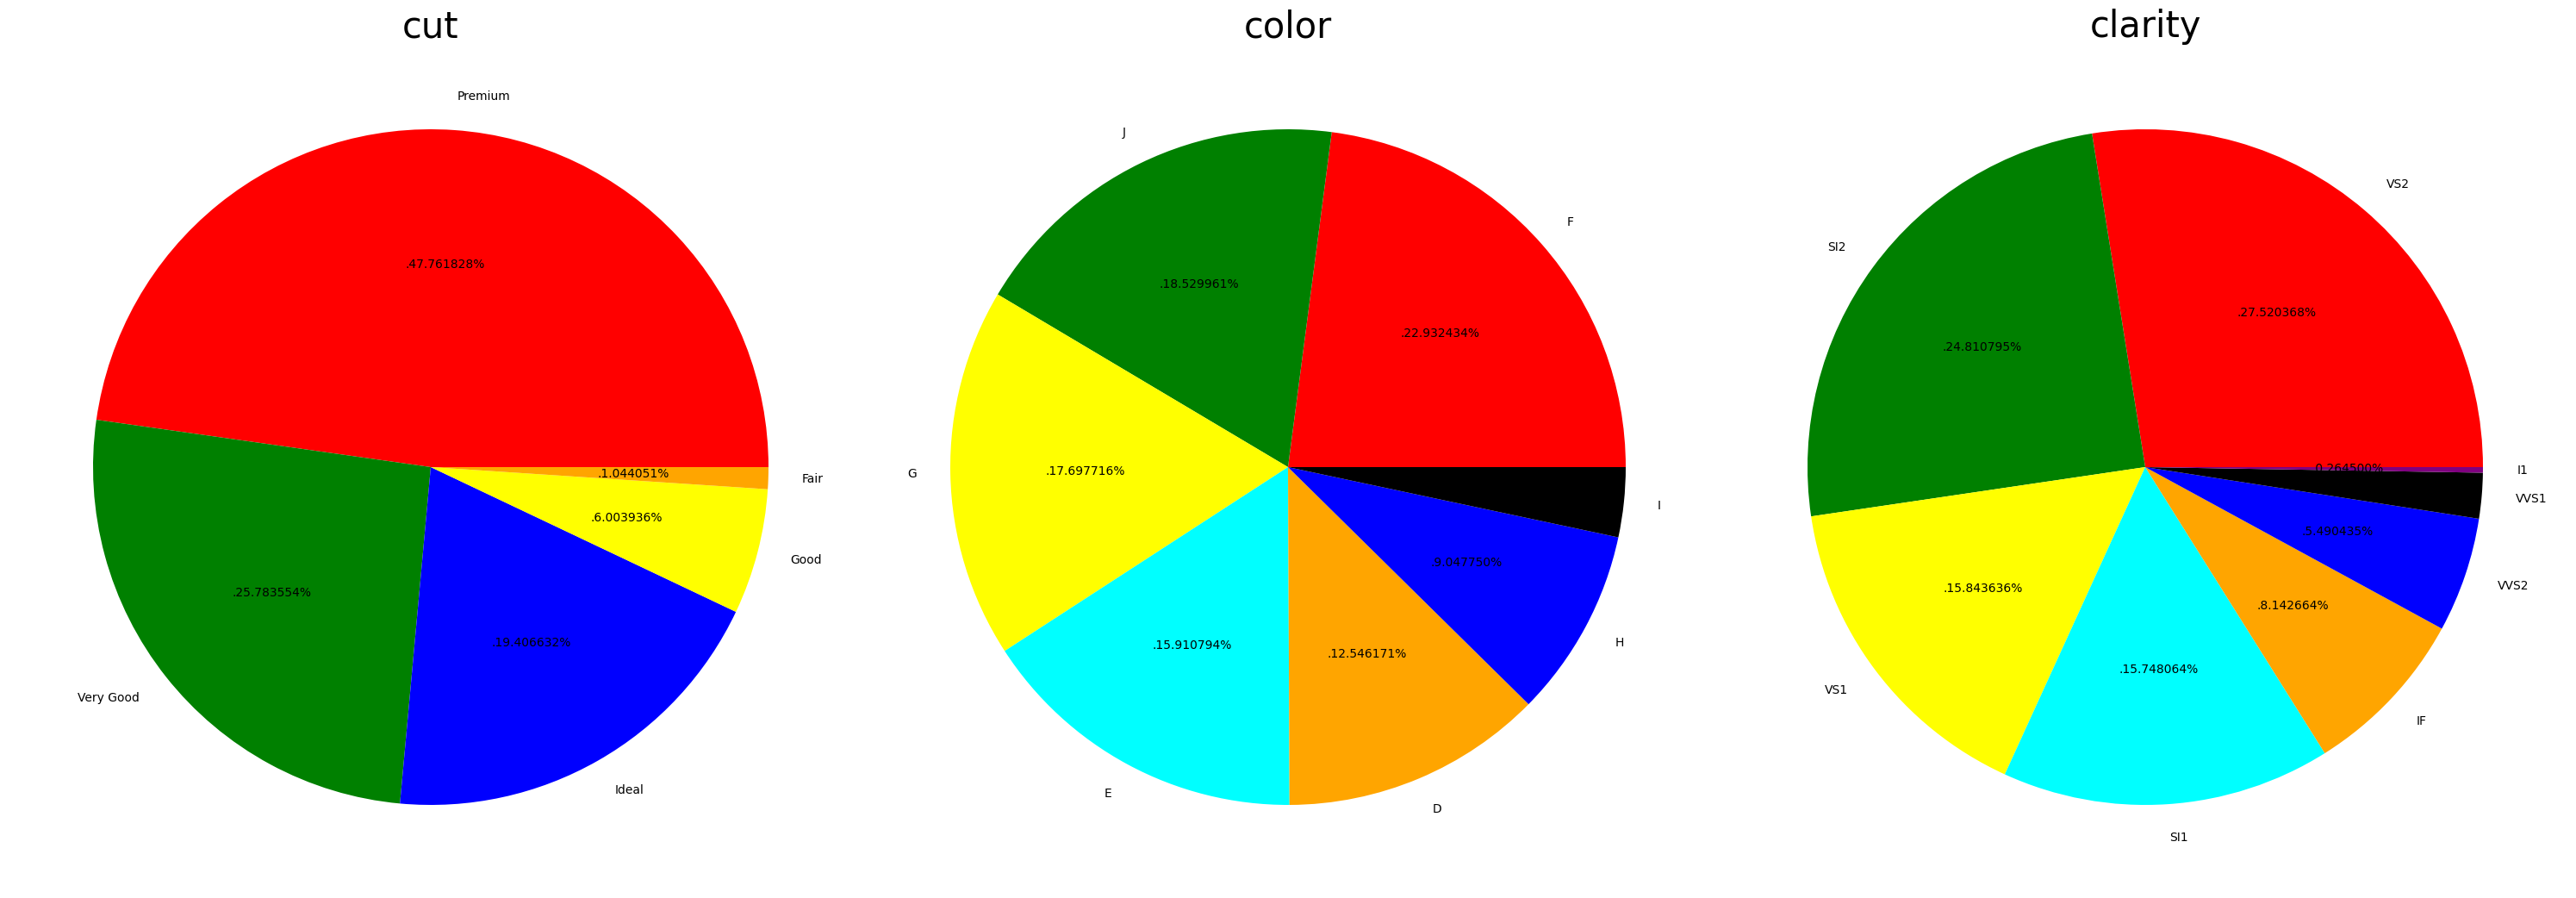

In [14]:
plt.rcParams['figure.figsize'] = (30, 30)

plt.subplot(1, 3, 1)
size = df['cut'].value_counts()
labels = 'Premium', 'Very Good', 'Ideal', 'Good', 'Fair'
color = ['red','green', 'blue', 'yellow', 'orange']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('cut', fontsize = 30)
plt.axis('off')



plt.subplot(1, 3, 2)
size = df['color'].value_counts()
labels = 'F', 'J', 'G', 'E', 'D', 'H', 'I'
color = ['red', 'green', 'yellow', 'cyan','orange', 'blue', 'black']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('color', fontsize = 30)
plt.axis('off')



plt.subplot(1, 3, 3)
size = df['clarity'].value_counts()
labels = 'VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'
color = ['red', 'green', 'yellow', 'cyan','orange', 'blue', 'black', 'purple']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('clarity', fontsize = 30)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

### Observations

- In cut feature, premium has the highest value followed by very good
- In color column, F has the highest percentage followed by J
- In clarity column, VS2 has the highest % followed by SI2

### Checking Outliers

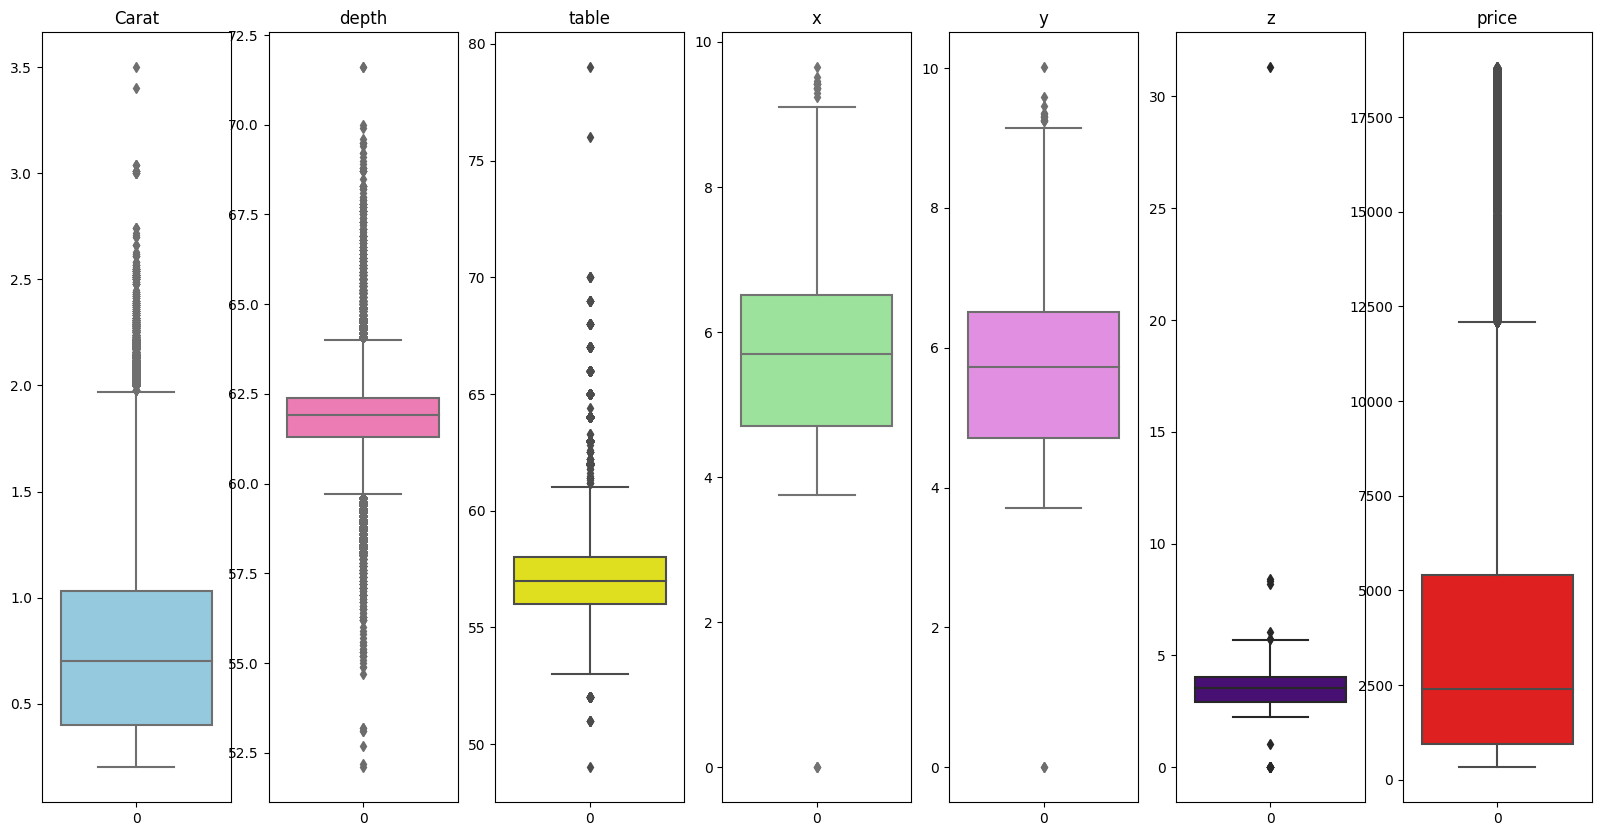

In [18]:
plt.subplots(1,7,figsize=(20,10))

plt.subplot(171)
sns.boxplot(df['carat'],color='skyblue')
plt.title('Carat')

plt.subplot(172)
sns.boxplot(df['depth'],color='hotpink')
plt.title('depth')

plt.subplot(173)
sns.boxplot(df['table'],color='yellow')
plt.title('table')

plt.subplot(174)
sns.boxplot(df['x'],color='lightgreen')
plt.title('x')

plt.subplot(175)
sns.boxplot(df['y'],color='violet')
plt.title('y')

plt.subplot(176)
sns.boxplot(df['z'],color='indigo')
plt.title('z')

plt.subplot(177)
sns.boxplot(df['price'],color='red')
plt.title('price')

plt.show()

### Observations

- There are outliers in every numerical feature.

/var/folders/4m/vrm5g1l51xn5x3bdqm97xhsr0000gn/T/ipykernel_31002/2976853551.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
/var/folders/4m/vrm5g1l51xn5x3bdqm97xhsr0000gn/T/ipykernel_31002/2976853551.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
/var/folders/4m/vrm5g1l51xn5x3bdqm97xhsr0000gn/T/ipykernel_31002/2976853551.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


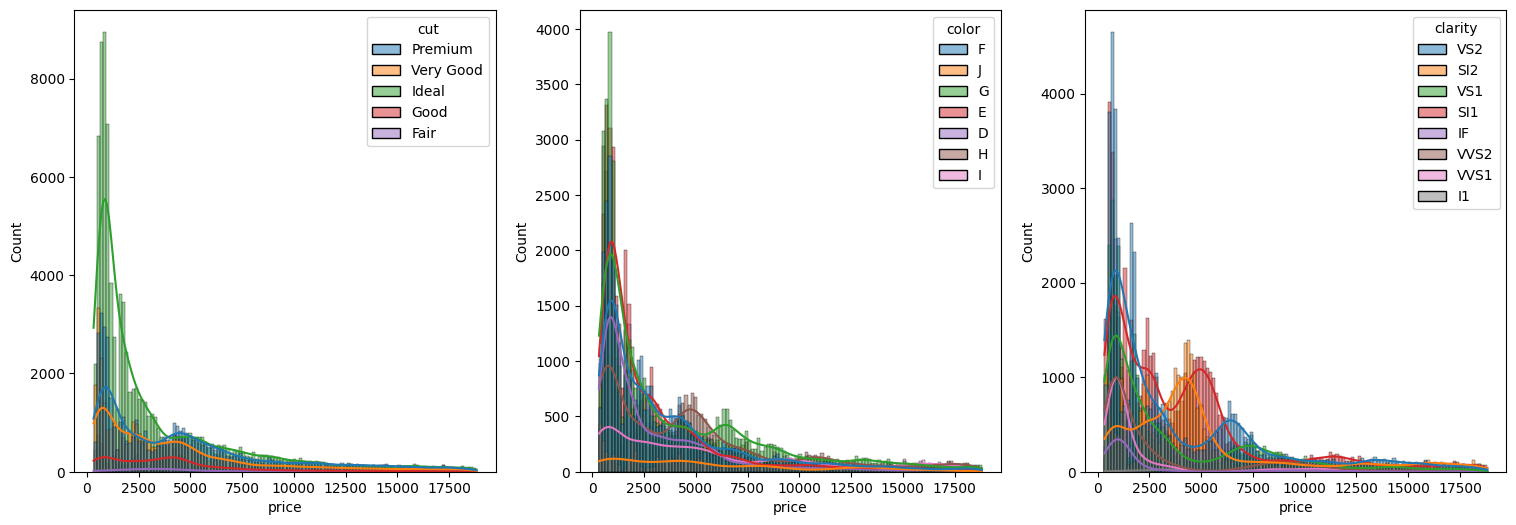

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='price',kde=True,hue='cut')
plt.subplot(142)
ax =sns.histplot(data=df, x='price',kde=True,hue='color')
plt.subplot(143)
ax =sns.histplot(data=df,x='price',kde=True,hue='clarity')
plt.show()

### Observations
- ideal, G and VS2 have the highest count in their respective features as they are the cheapest


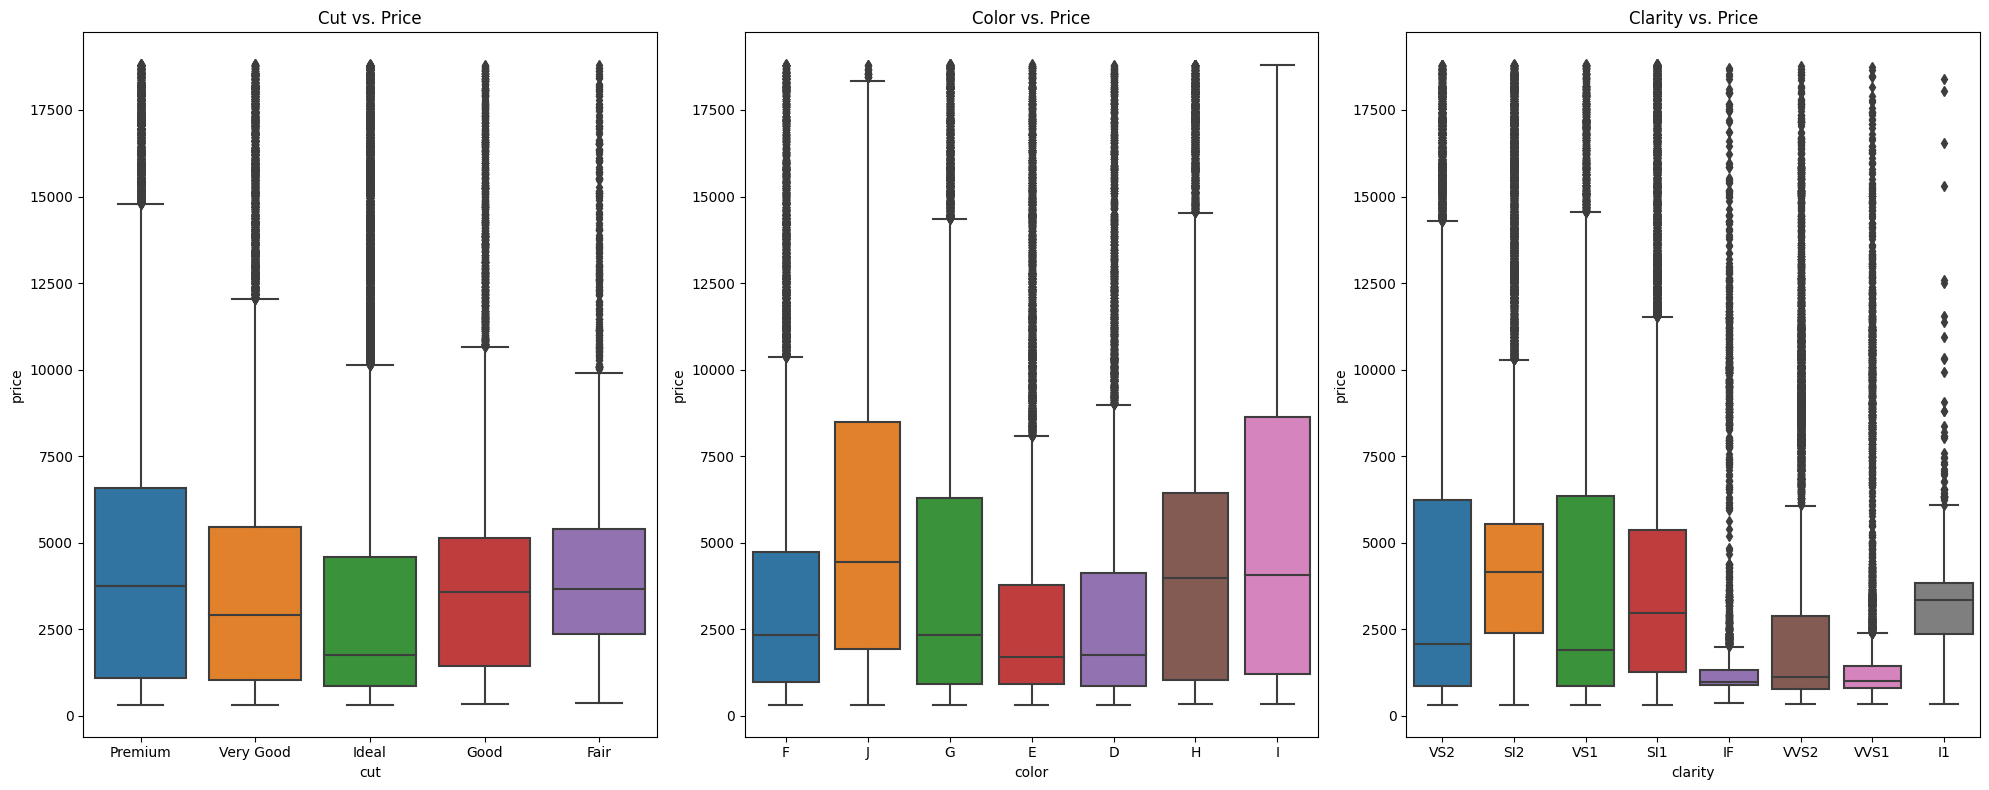

In [20]:
plt.figure(figsize=(20, 8))

# Boxplot for "cut"
plt.subplot(131)
sns.boxplot(x='cut', y='price', data=df)
plt.title("Cut vs. Price")

# Boxplot for "color"
plt.subplot(132)
sns.boxplot(x='color', y='price', data=df)
plt.title("Color vs. Price")

# Boxplot for "clarity"
plt.subplot(133)
sns.boxplot(x='clarity', y='price', data=df)
plt.title("Clarity vs. Price")

plt.tight_layout()
plt.show()

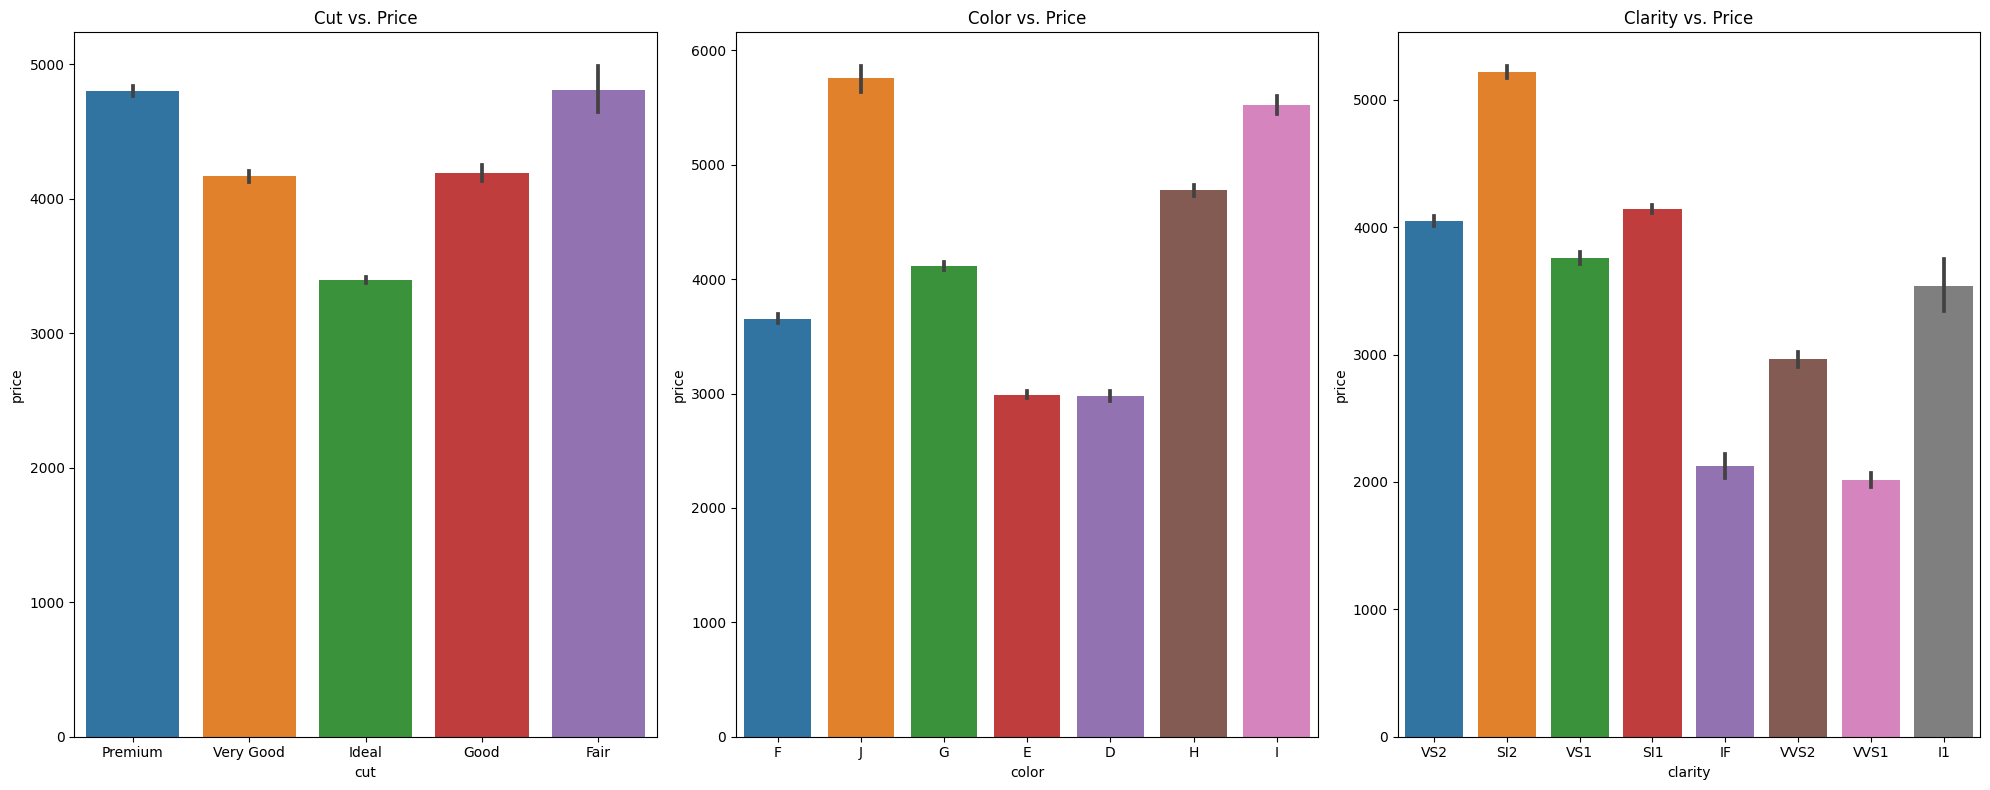

In [21]:
plt.figure(figsize=(20, 8))

plt.subplot(131)
sns.barplot(x='cut', y='price', data=df)
plt.title("Cut vs. Price")

# Bar plot for "color"
plt.subplot(132)
sns.barplot(x='color', y='price', data=df)
plt.title("Color vs. Price")

# Bar plot for "clarity"
plt.subplot(133)
sns.barplot(x='clarity', y='price', data=df)
plt.title("Clarity vs. Price")

plt.tight_layout()
plt.show()

### Observation

- In cut feature, fair is the most costliest category as compare to other category 
- In color feature, J is the most expensive category as compare to other category 
- In clarity feature, SI2 is the most costliest category as compare to other category 

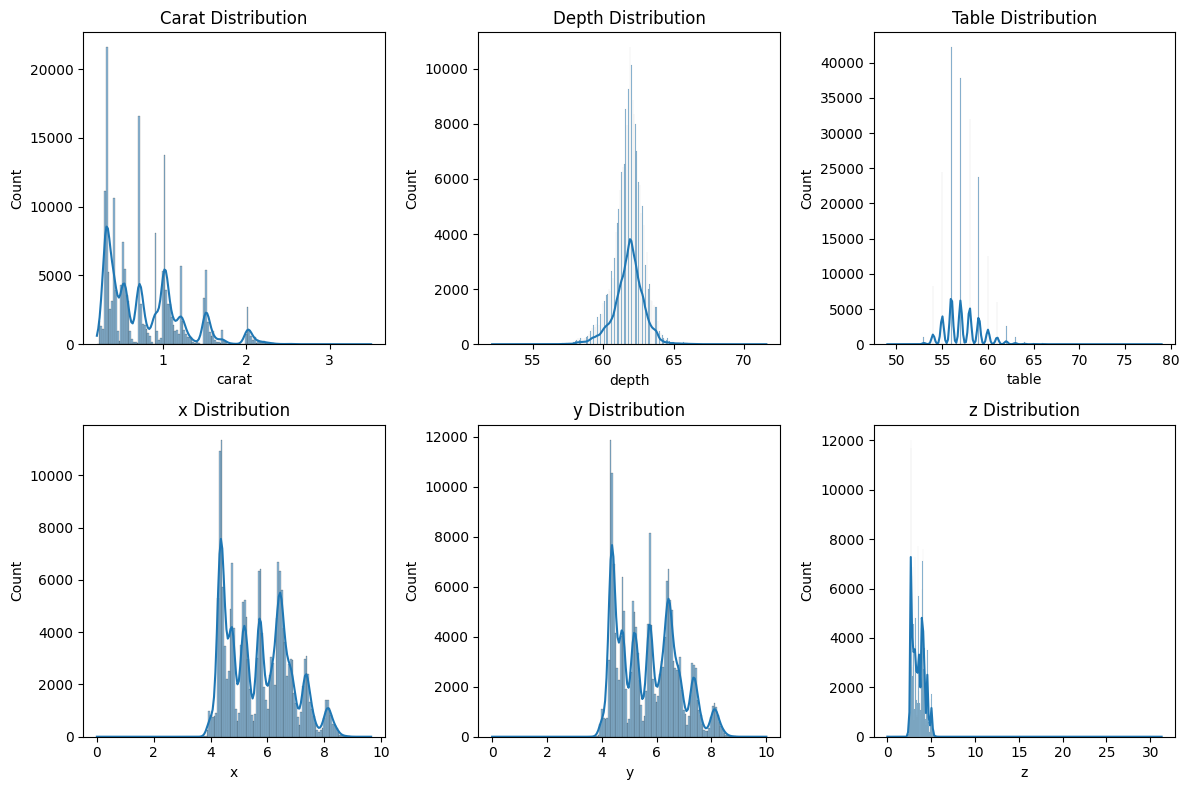

In [25]:
# plotting frequency count of numerical features/columns

plt.figure(figsize=(12, 8))

# Distribution plot for "carat"
plt.subplot(231)
sns.histplot(df['carat'], kde=True)
plt.title("Carat Distribution")

# Distribution plot for "depth"
plt.subplot(232)
sns.histplot(df['depth'], kde=True)
plt.title("Depth Distribution")

# Distribution plot for "table"
plt.subplot(233)
sns.histplot(df['table'], kde=True)
plt.title("Table Distribution")

# Distribution plot for "x"
plt.subplot(234)
sns.histplot(df['x'], kde=True)
plt.title("x Distribution")

# Distribution plot for "y"
plt.subplot(235)
sns.histplot(df['y'], kde=True)
plt.title("y Distribution")

# Distribution plot for "z"
plt.subplot(236)
sns.histplot(df['z'], kde=True)
plt.title("z Distribution")

plt.tight_layout()
plt.show()

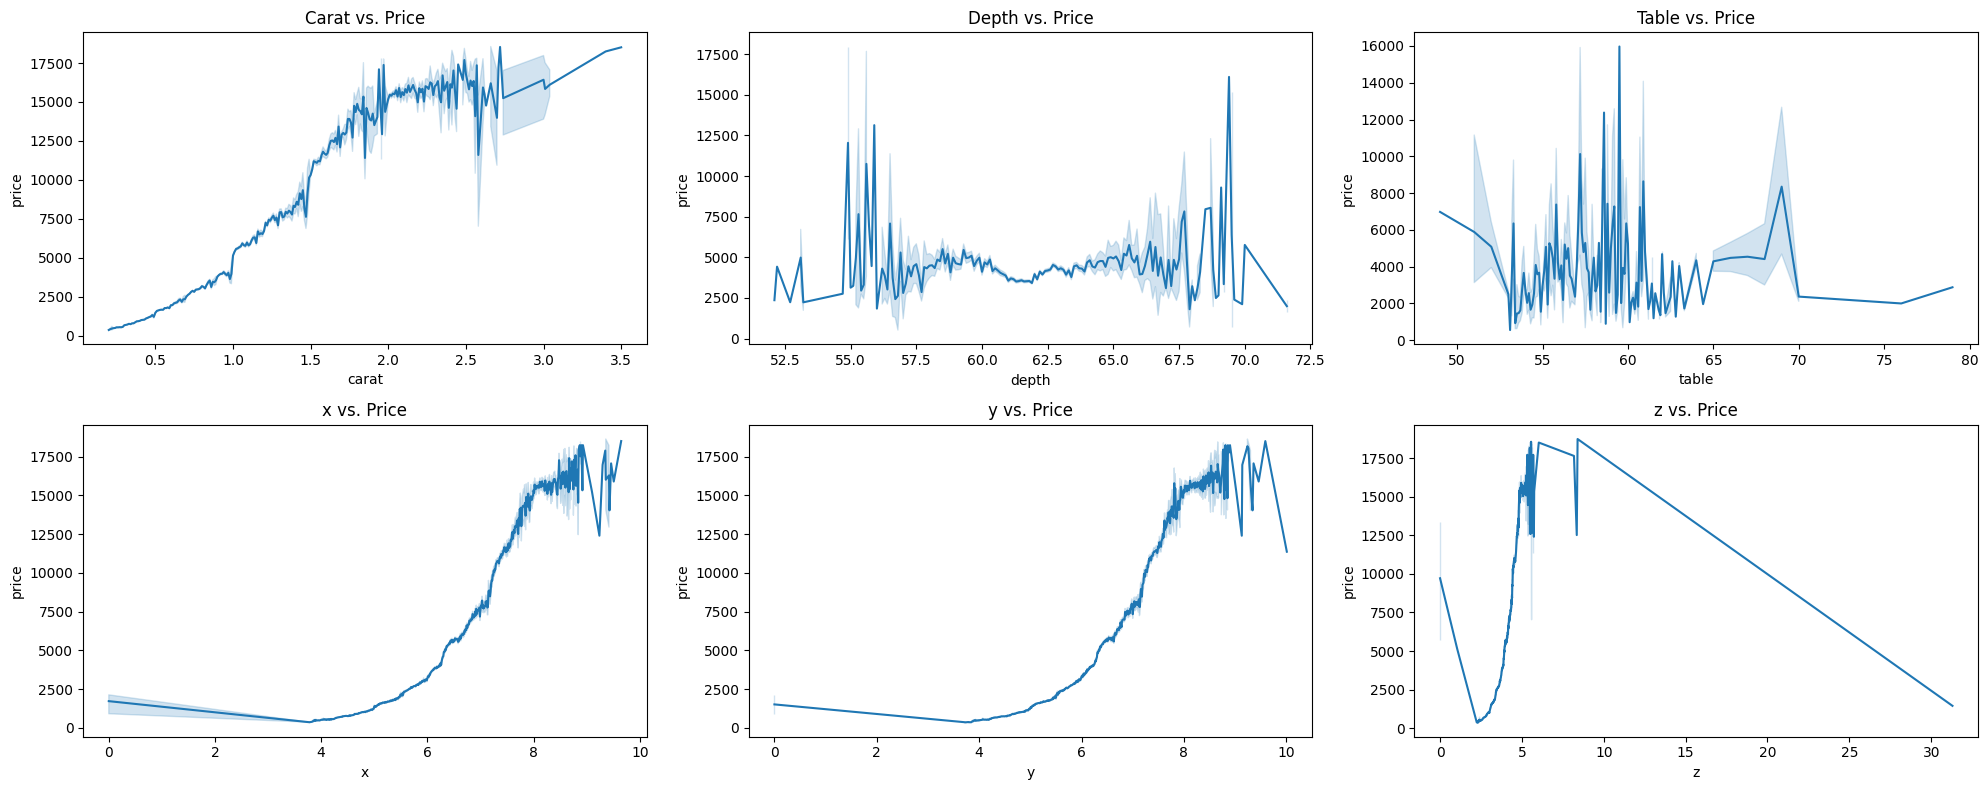

In [26]:
#comparing numerical features with target feature

plt.figure(figsize=(20, 8))

# Line plot for "carat"
plt.subplot(231)
sns.lineplot(x='carat', y='price', data=df)
plt.title("Carat vs. Price")

# Line plot for "depth"
plt.subplot(232)
sns.lineplot(x='depth', y='price', data=df)
plt.title("Depth vs. Price")

# Line plot for "table"
plt.subplot(233)
sns.lineplot(x='table', y='price', data=df)
plt.title("Table vs. Price")

# Line plot for "x"
plt.subplot(234)
sns.lineplot(x='x', y='price', data=df)
plt.title("x vs. Price")

# Line plot for "y"
plt.subplot(235)
sns.lineplot(x='y', y='price', data=df)
plt.title("y vs. Price")

# Line plot for "z"
plt.subplot(236)
sns.lineplot(x='z', y='price', data=df)
plt.title("z vs. Price")

plt.tight_layout()
plt.show()

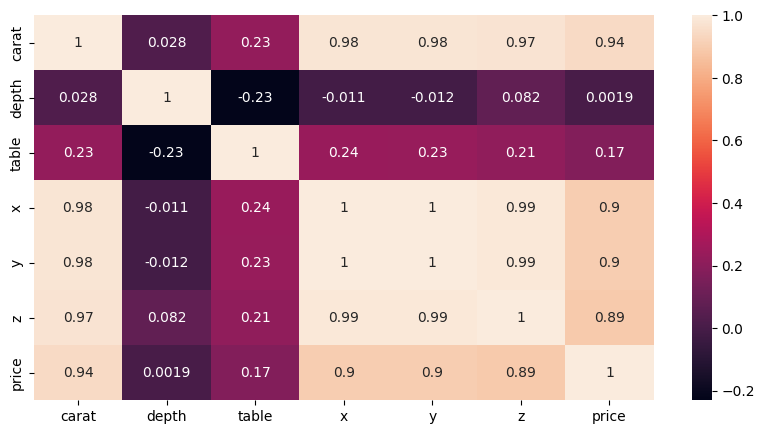

In [29]:
# finding correlation of all the numerical features w.r.t target feature 
plt.figure(figsize=(10, 5))
sns.heatmap(df[numerical_features].corr(),annot=True)
plt.show()

### Observation 
- x, y, z and carat are highly correlated to the target feature. 
- In model_training part we can drop x, y and z and keep only carat feature. 
